In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/placement-sample-csv/placement_dataset_sample.csv')
df

,cgpa,placement_exam_marks,placed
0,6.56,60.0,0
1,7.89,39.0,1
2,6.77,75.0,1
3,6.53,46.0,0
4,6.23,31.0,0


In [47]:
df.shape

(5, 3)

In [48]:
df.sample(5)

,cgpa,placement_exam_marks,placed
1,7.89,39.0,1
3,6.53,46.0,0
4,6.23,31.0,0
2,6.77,75.0,1
0,6.56,60.0,0


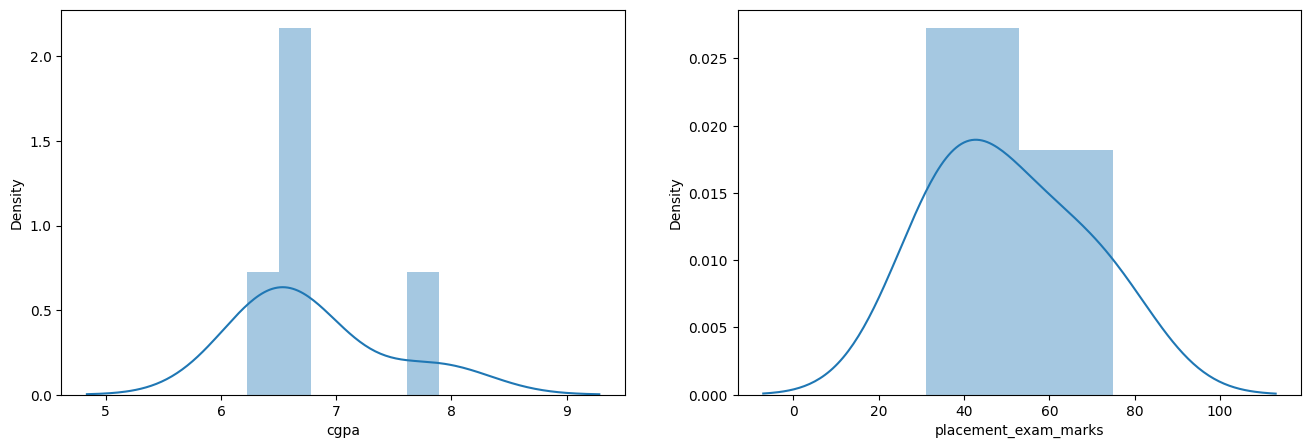

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

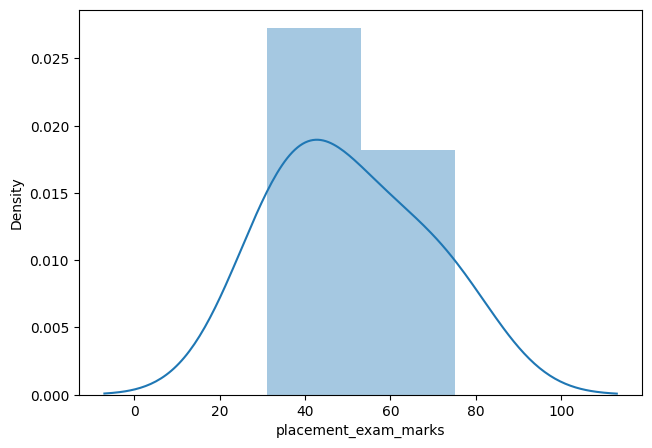

In [52]:
plt.figure(figsize=(16,5))
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [54]:
print("Mean value of cgpa:", df['cgpa'].mean())
print("Std value of cgpa:", df['cgpa'].std())
print("Min value of cgpa:", df['cgpa'].min())
print("Max value of cgpa:", df['cgpa'].max())

Mean value of cgpa: 6.796000000000001
Std value of cgpa: 0.6411552074186091
Min value of cgpa: 6.23
Max value of cgpa: 7.89


<Axes: >

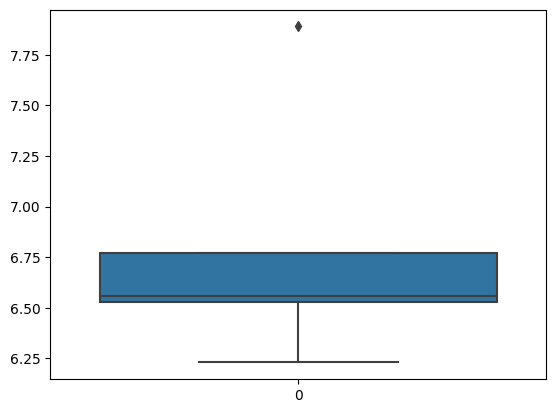

In [56]:
sns.boxplot(df['cgpa'])

<Axes: >

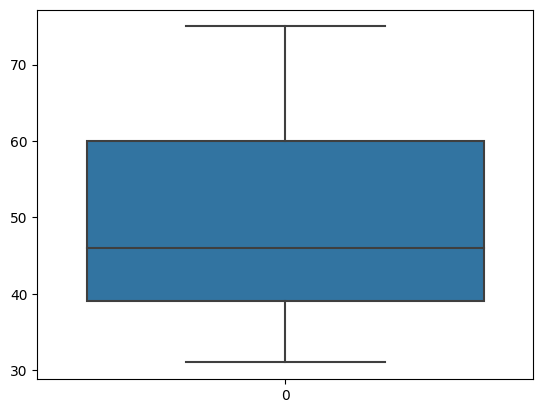

In [57]:
sns.boxplot(df['placement_exam_marks'])

#### Find the boundary values

In [59]:
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())

Highest allowed 8.719465622255829


In [61]:
print("lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

lowest allowed 4.872534377744174


#### Find the outliers

In [63]:
df[(df['cgpa']>6.23)| (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
0,6.56,60.0,0
1,7.89,39.0,1
2,6.77,75.0,1
3,6.53,46.0,0


### Trimming

In [41]:
new_df=df[(df['cgpa']<6.23)&(df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed


In [64]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
df.head()


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,6.56,60.0,0,-0.368086
1,7.89,39.0,1,1.706295
2,6.77,75.0,1,-0.040552
3,6.53,46.0,0,-0.414876
4,6.23,31.0,0,-0.882782


### Calculating the Zscore

In [78]:
df[df['cgpa_zscore']>1]

,cgpa,placement_exam_marks,placed,cgpa_zscore
1,7.89,39.0,1,1.706295


In [80]:
df[df['cgpa_zscore']<-1]

,cgpa,placement_exam_marks,placed,cgpa_zscore


In [83]:
df[(df['cgpa_zscore'] > 1) | (df['cgpa_zscore'] < -1)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
1,7.89,39.0,1,1.706295


In [84]:
import numpy as np


upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)
df['cgpa_cap'] = np.where(df['cgpa'] > upper_limit, upper_limit,
               np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa']))


print(df['cgpa'].head()) 


Upper Limit: 8.719465622255829
Lower Limit: 4.872534377744174
0    6.56
1    7.89
2    6.77
3    6.53
4    6.23
Name: cgpa, dtype: float64


In [85]:
df.shape

(5, 5)

In [86]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore,cgpa_cap
count,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,6.796000,50.200000,0.400000,-1.931788e-15,6.796000
std,0.641155,17.484279,0.547723,1.000000e+00,0.641155
min,6.230000,31.000000,0.000000,-8.827816e-01,6.230000
25%,6.530000,39.000000,0.000000,-4.148761e-01,6.530000
50%,6.560000,46.000000,0.000000,-3.680856e-01,6.560000
75%,6.770000,60.000000,1.000000,-4.055180e-02,6.770000
max,7.890000,75.000000,1.000000,1.706295e+00,7.890000


<Figure size 1600x500 with 0 Axes>

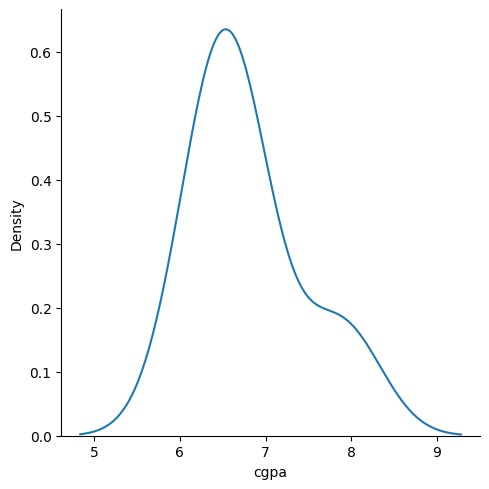

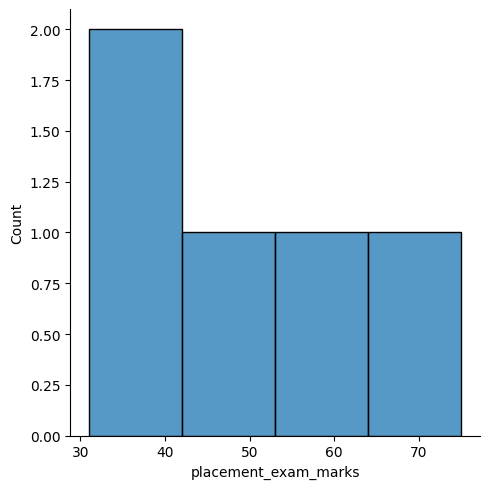

In [87]:
plt.figure(figsize=(16,5))
sns.displot(df['cgpa'],kind='kde')
sns.displot(df['placement_exam_marks'],kind='hist')
plt.show()

### Finding the IQR

In [88]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
percentile25
percentile75

60.0

In [89]:
iqr=percentile75-percentile25
iqr

21.0

In [90]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25+1.5*iqr
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 91.5
lower_limit 70.5


### Finding Outliers

In [92]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore,cgpa_cap


In [93]:
df[df['placement_exam_marks']>lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore,cgpa_cap
2,6.77,75.0,1,-0.040552,6.77


### Trimming

In [94]:
new_df=df[df['placement_exam_marks']<upper_limit]
new_df.shape

(5, 5)

<Axes: xlabel='placement_exam_marks'>

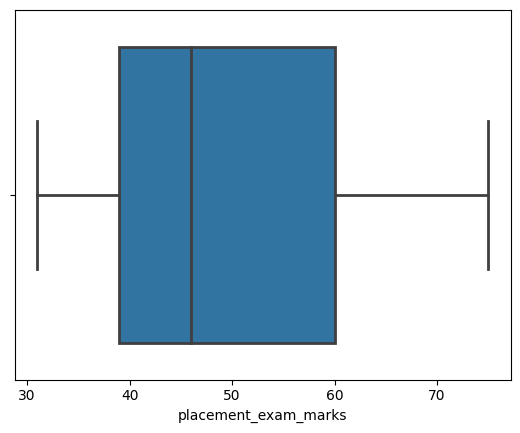

In [95]:
sns.boxplot(x='placement_exam_marks',data=new_df,orient='h',hue='placed',linewidth=2)

<Axes: xlabel='placed', ylabel='placement_exam_marks'>

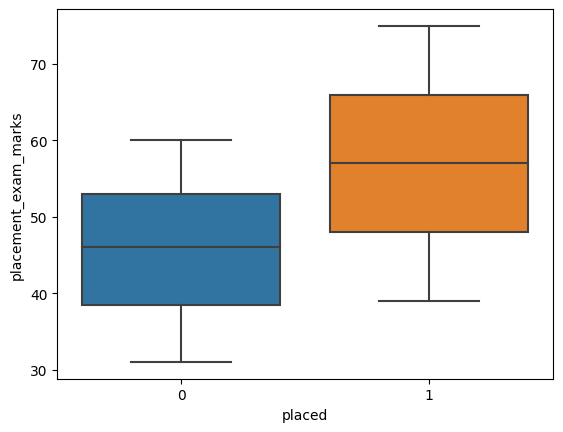

In [96]:
sns.boxplot(x='placed',y='placement_exam_marks',data=new_df)

### Capping

In [102]:

new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)


In [ ]:
np.where(condition,true,false)

In [108]:
new_df_cap.shape

(5, 5)